In [27]:
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
model = models.load_model('model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 128)               196736    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 54,542,378
Trainable params: 205,642
Non

In [28]:
labels = {0: 'American Shorthair',
 1: 'Bengal',
 2: 'Calico',
 3: 'Persian',
 4: 'Ragdoll',
 5: 'Siamese',
 6: 'Tabby',
 7: 'Torbie',
 8: 'Tortoiseshell',
 9: 'Tuxedo'}

In [29]:
array_paths = []
for dirpath, dirnames, filenames in os.walk('images'):
  for filename in filenames:
    ids = filename.split('.')[0]
    array_paths.append({'path': os.path.join(dirpath, filename)})
file_paths = pd.DataFrame(array_paths)
file_paths.sort_values('path')

,path
73360,images/Abyssinian/12136161_252.jpg
73336,images/Abyssinian/13743713_251.jpg
73424,images/Abyssinian/14092337_250.jpg
73457,images/Abyssinian/14210840_249.jpg
73476,images/Abyssinian/14475392_248.jpg
...,...
107719,images/Tuxedo/46803894_20.jpg
106504,images/Tuxedo/46804405_13.jpg
107683,images/Tuxedo/46806582_5.jpg
108620,images/Tuxedo/46806627_4.jpg


In [30]:
file_paths.loc[:, 'breed'] = file_paths['path'].str.split('/').str[1]
file_paths = file_paths[~file_paths['breed'].str.contains('Domestic')]
valcounts = file_paths['breed'].value_counts()
valcounts = valcounts[:10]
file_paths = file_paths[file_paths['breed'].isin(valcounts.index)]
file_paths

,path,breed
0,images/Torbie/31688453_8385.jpg,Torbie
1,images/Torbie/33036156_7706.jpg,Torbie
2,images/Torbie/42775609_2250.jpg,Torbie
3,images/Torbie/44691870_1271.jpg,Torbie
4,images/Torbie/43601571_1794.jpg,Torbie
...,...,...
117852,images/American Shorthair/43762951_6100.jpg,American Shorthair
117853,images/American Shorthair/42687657_7890.jpg,American Shorthair
117854,images/American Shorthair/41769872_9379.jpg,American Shorthair
117855,images/American Shorthair/42222850_8624.jpg,American Shorthair


In [44]:
datagen = ImageDataGenerator(rescale=1./255)
sample_file_paths = file_paths.sample(n=12)
images = datagen.flow_from_dataframe(sample_file_paths, x_col='path', y_col='path', target_size=(300, 300), shuffle=False)
sample_file_paths

Found 12 validated image filenames belonging to 12 classes.


,path,breed
96595,images/Persian/44907361_655.jpg,Persian
76175,images/Siamese/46090795_2968.jpg,Siamese
72573,images/Tortoiseshell/46347822_40044.jpg,Tortoiseshell
100266,images/Persian/34705629_4143.jpg,Persian
76193,images/Siamese/45994227_3750.jpg,Siamese
1479,images/Torbie/31226411_8639.jpg,Torbie
117712,images/American Shorthair/44259776_5472.jpg,American Shorthair
2474,images/Torbie/32845844_7824.jpg,Torbie
116671,images/American Shorthair/42071720_8929.jpg,American Shorthair
69762,images/Tortoiseshell/42715263_8186.jpg,Tortoiseshell


In [45]:
confidences = model.predict(images)
predictions = np.argmax(confidences, axis=1)
predictions

1/1 [==============================] - 0s 99ms/step


array([3, 5, 8, 3, 0, 7, 2, 2, 0, 0, 8, 8])

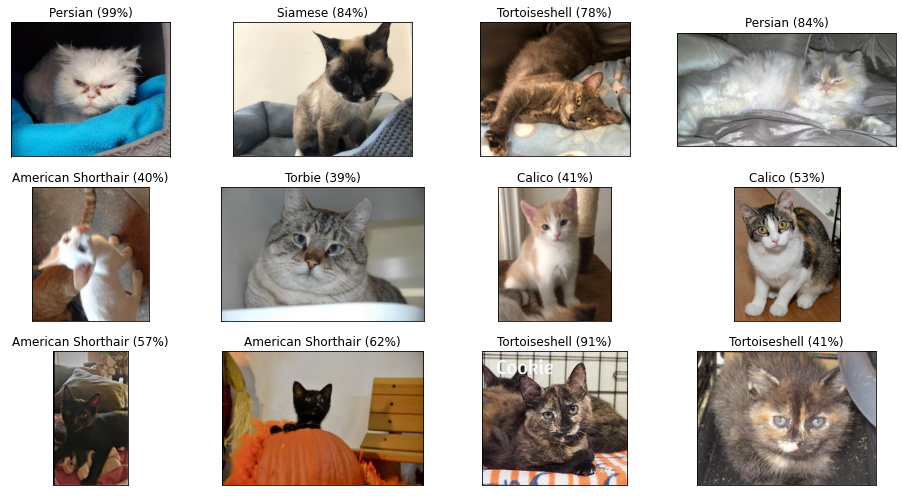

In [46]:
fig, axes = plt.subplots(nrows=math.ceil(predictions.size / 4), ncols=4, figsize=(13,7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  if i < file_paths.shape[0]:
    ax.imshow(plt.imread(sample_file_paths['path'].iloc[i]))
    ax.set_title(str(labels[predictions[i]]) + ' (' + str(round(100 * confidences[i][predictions[i]])) + '%)')

plt.tight_layout()
fig.savefig('sample.png')